In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pycaret
from pycaret.regression import *
from functions import MAPE, plot_train_test_errors_ridge, plot_train_test_errors_lasso
import warnings
warnings.filterwarnings("ignore")

In [56]:
cmap='seismic'
sns.set_palette(sns.color_palette(cmap))

In [57]:
df = pd.read_csv('Concrete_Data.csv', header=None)
df.columns =['Cement ', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 
             'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete compressive strength']
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


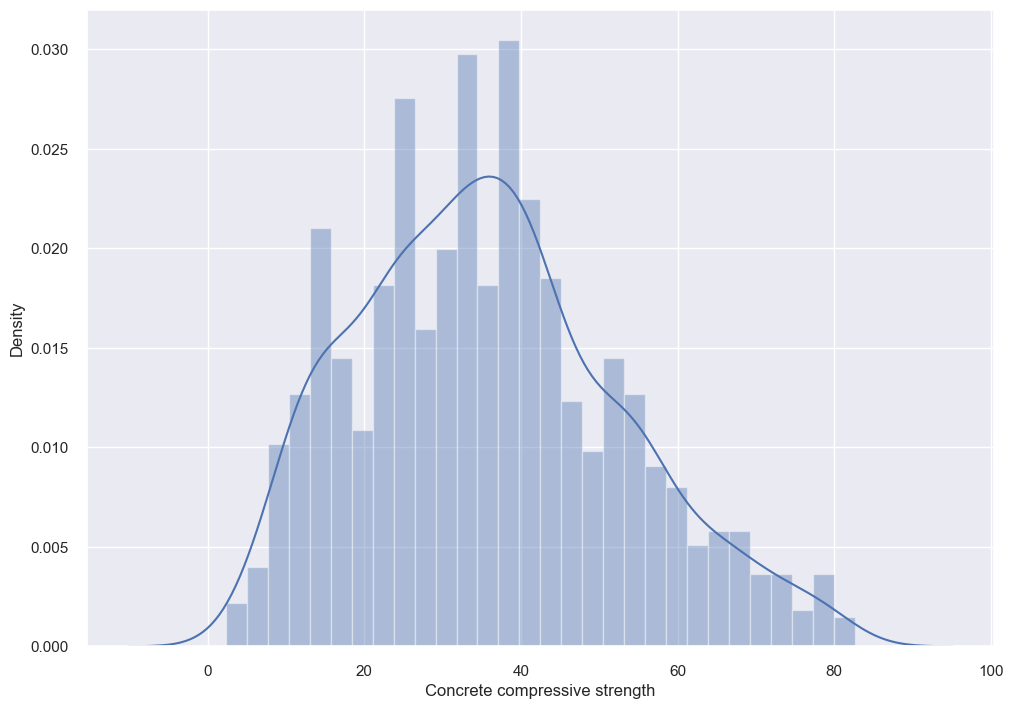

In [58]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(df['Concrete compressive strength'], bins=30)
plt.show()

In [59]:
#s = setup(data = df, target = 'Concrete compressive strength', session_id=123, silent=True) 

In [60]:
#best = compare_models(sort='MSE')

In [61]:
#lasso = create_model('lasso')

In [62]:
#print(lasso)

In [63]:
#tuned_lasso = tune_model(lasso)

In [64]:
#print(tuned_lasso)

In [65]:
df.isna().sum() # no missing values in the dataframe

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

array([[<AxesSubplot: title={'center': 'Cement '}>,
        <AxesSubplot: title={'center': 'Blast Furnace Slag'}>,
        <AxesSubplot: title={'center': 'Fly Ash'}>],
       [<AxesSubplot: title={'center': 'Water'}>,
        <AxesSubplot: title={'center': 'Superplasticizer'}>,
        <AxesSubplot: title={'center': 'Coarse Aggregate'}>],
       [<AxesSubplot: title={'center': 'Fine Aggregate'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Concrete compressive strength'}>]],
      dtype=object)

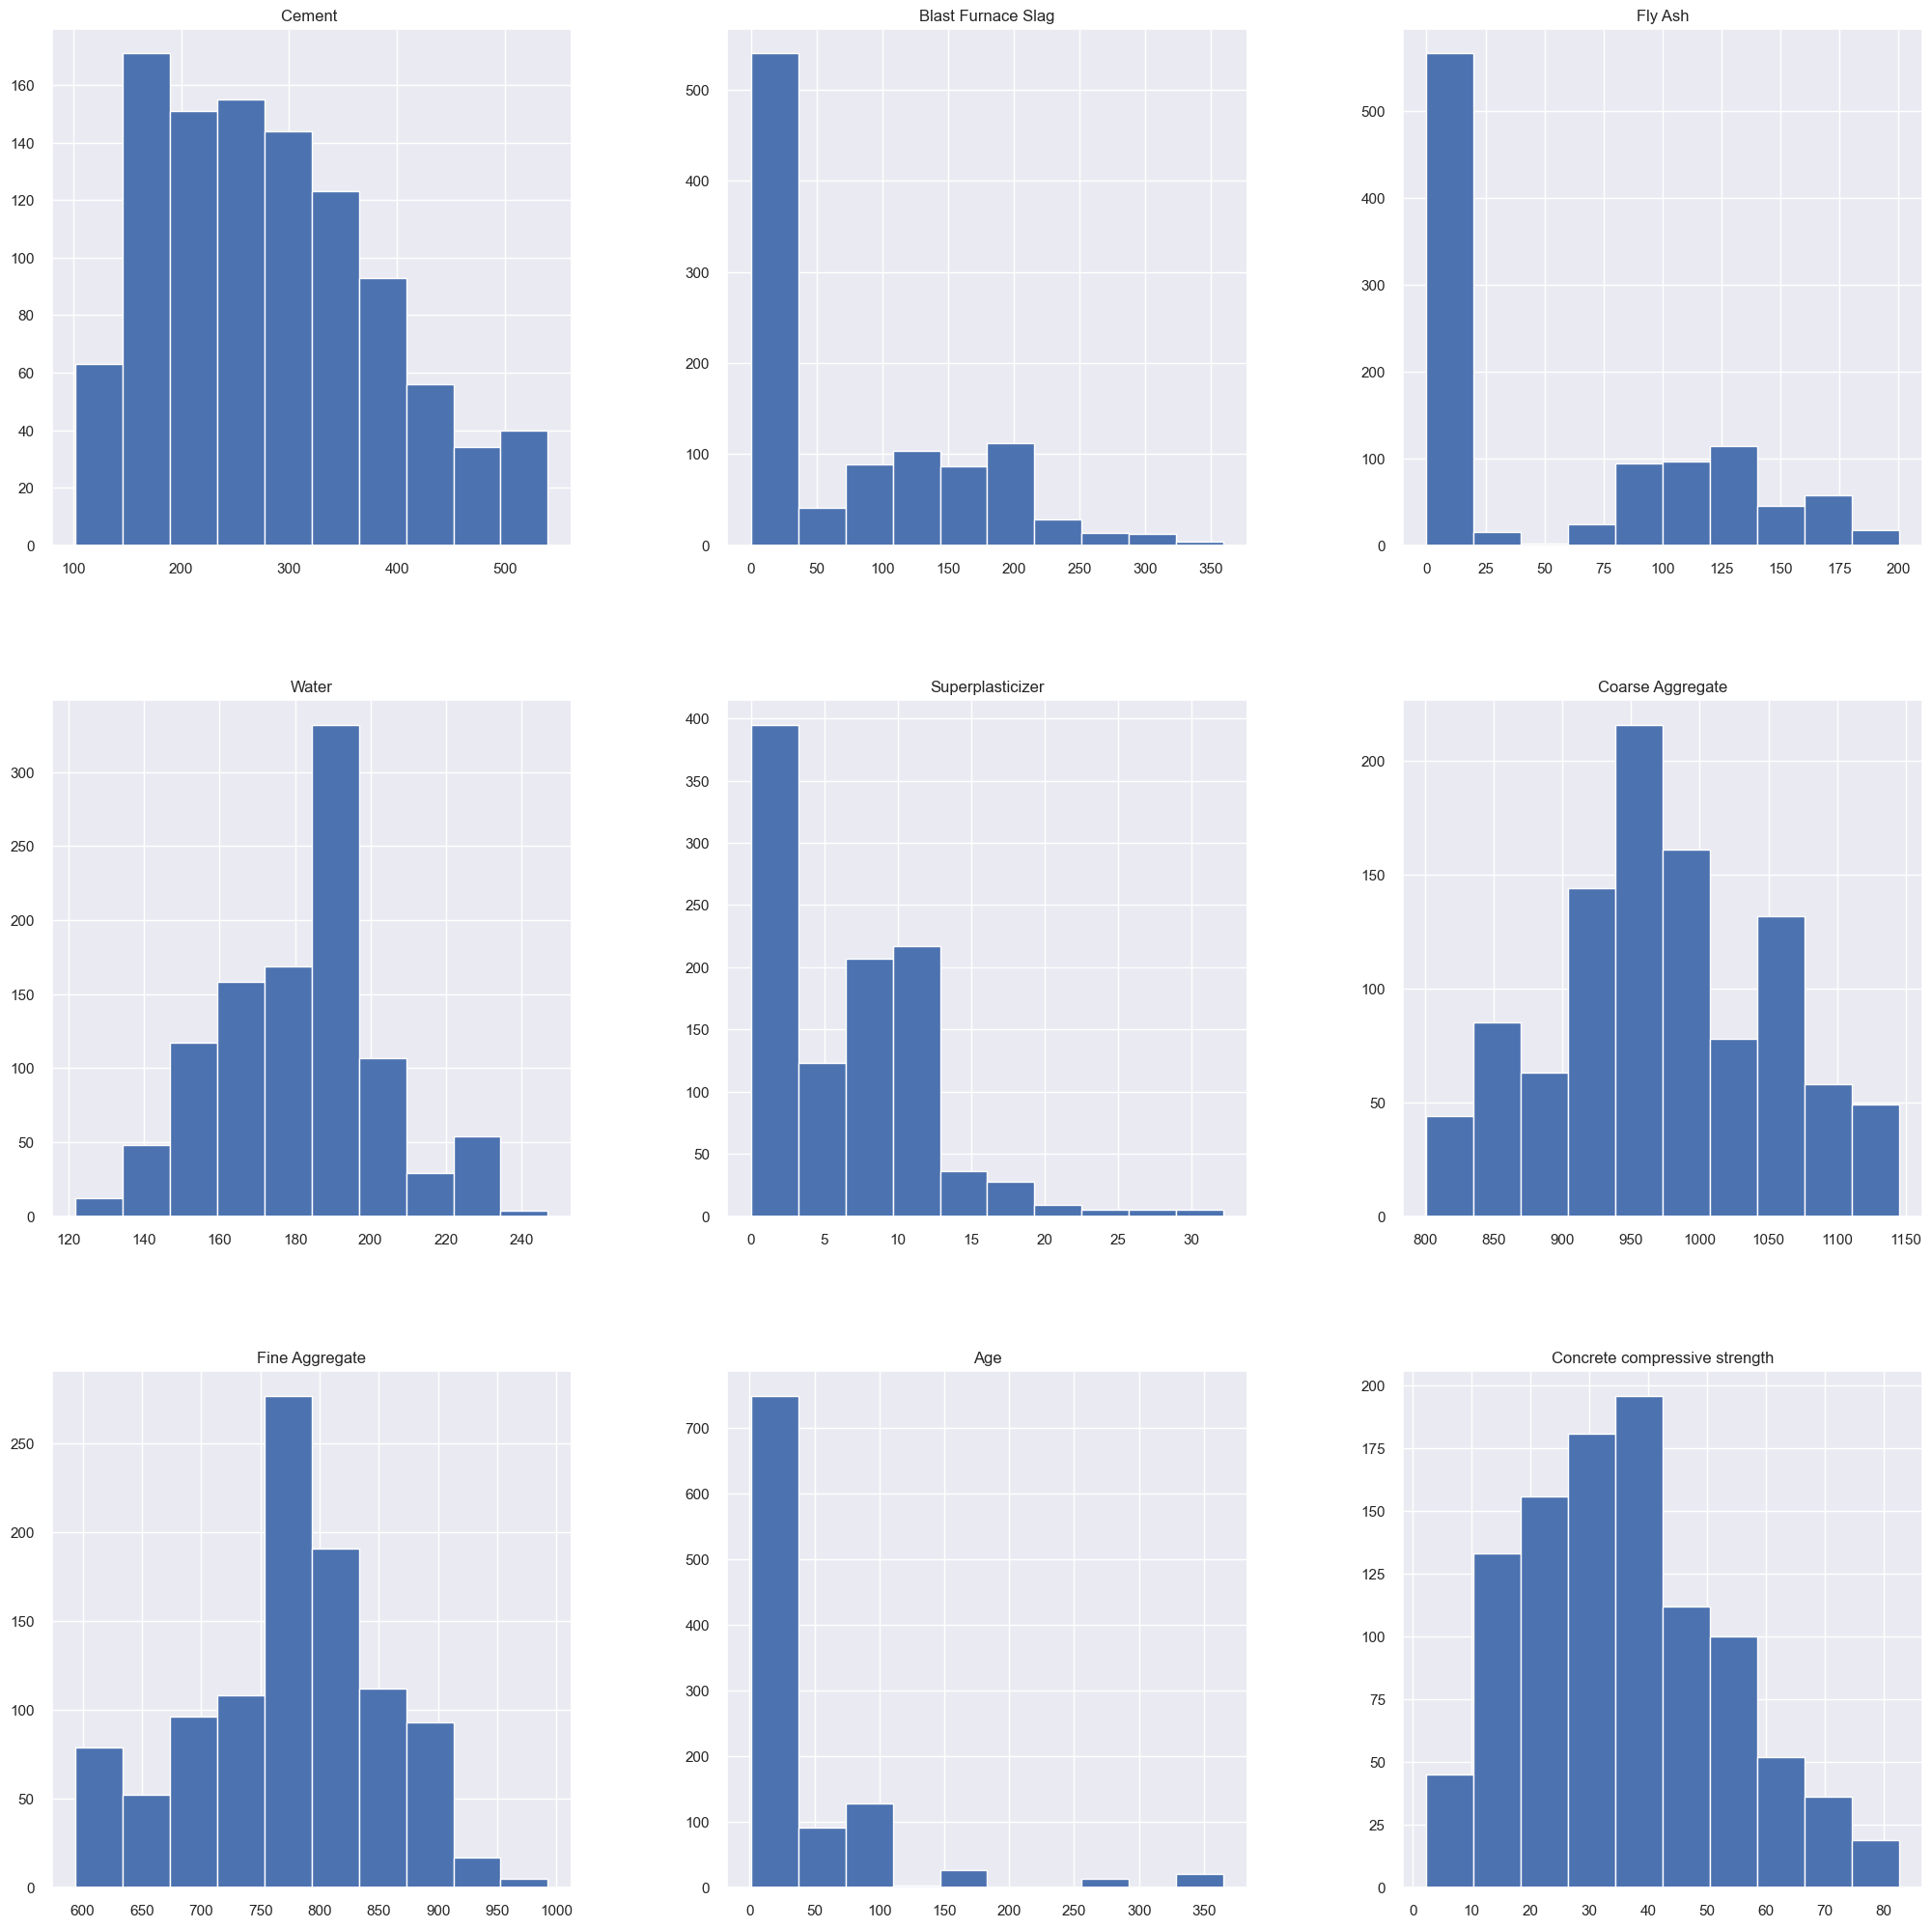

In [66]:
# visualizing the dataframe
df.hist(figsize=(25,25))

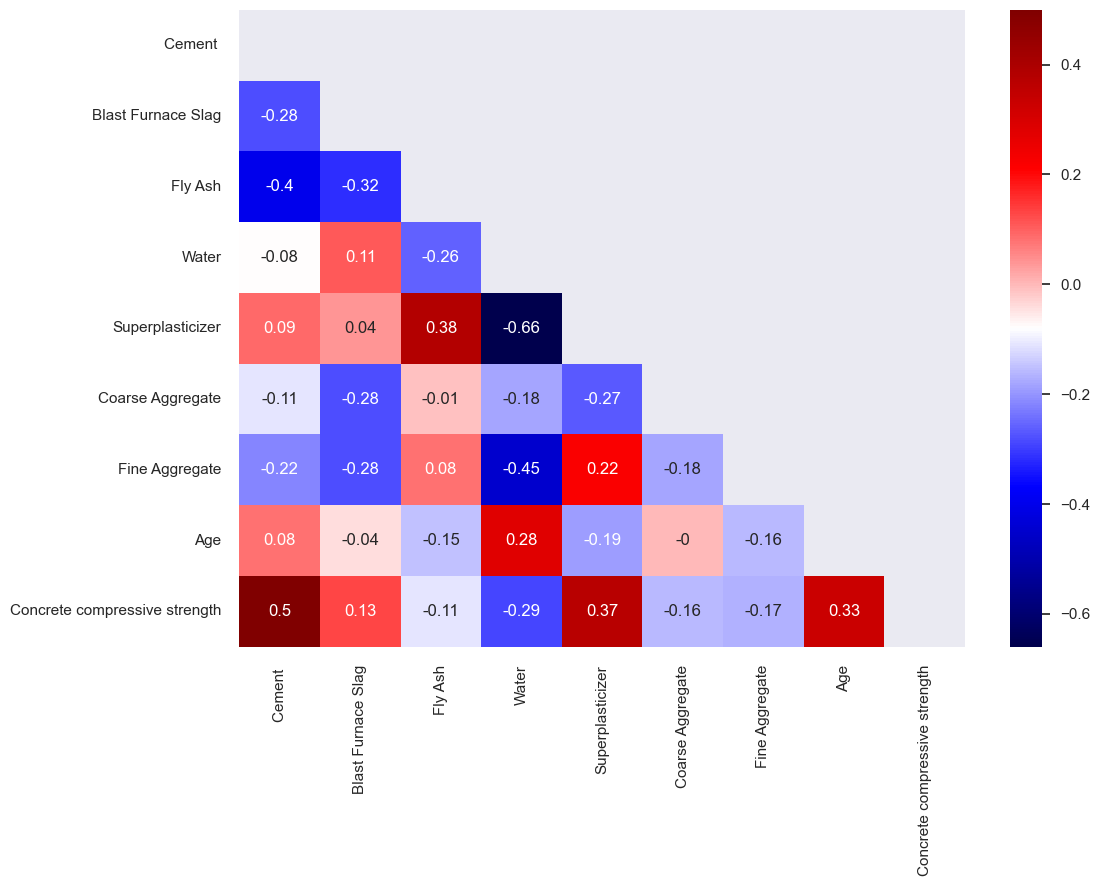

In [67]:
correlation_matrix = df.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(data=correlation_matrix, annot=True,cmap=cmap,mask=mask)
plt.savefig("visualizations/correlation_matrix_.png",bbox_inches='tight')

In [68]:
# Splitting the data into train and test data

X = df[['Cement ', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 
        'Coarse Aggregate', 'Fine Aggregate', 'Age']]
y = df['Concrete compressive strength'] # the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(721, 8)
(309, 8)
(721,)
(309,)


The **Min-Max Scaling** uses the minimum and maximum value of a feature to rescale values within a range typically between 0 to 1 or -1 to 1. The shape of the distribution doesn’t change. 

In [69]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

--------------------------
The **Mean Squared Error (MSE)** is a risk metric corresponding to the expected value of the squared (quadratic) error or loss defined as

$$
MSE = \frac{1}{N}|| \textbf{y} - \hat{\textbf{y}} ||_{2}^{2}.
$$

The **Mean Absolute Error (MAE)** is a risk metric corresponding to the expected value of the absolute error loss and it is defined as 

$$
MAE = \frac{1}{N}|| \textbf{y} - \hat{\textbf{y}} ||_{1}.
$$

The **Mean Absolute Percentage Error (MAPE)** expresses the accuracy as a ratio defined by the formula

$$
MAPE = \frac{1}{N} \sum_{i=1}^{N} |\frac{y(i)-\hat{y}(i)}{y(i)}| .
$$

---------------------
# Ordinary Least Squares regression (OLS) 

In [70]:
ols = LinearRegression()
ols.fit(X_train_scaled, y_train)
y_train_pred = ols.predict(X_train_scaled)
y_test_pred = ols.predict(X_test_scaled)

print("--------------------------------------")
print("The model performance for training set")
print("--------------------------------------")
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_train, y_train_pred))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_train, y_train_pred))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_train, y_train_pred))
print("--------------------------------------")
print("The model performance for testing set")
print("--------------------------------------")
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_test, y_test_pred))

--------------------------------------
The model performance for training set
--------------------------------------
Mean squared error (MSE): 107.24
Mean absolute error (MAE): 8.18
Mean Absolute Percentage Error (MAPE): 31.39
--------------------------------------
The model performance for testing set
--------------------------------------
Mean squared error (MSE): 109.75
Mean absolute error (MAE): 8.30
Mean Absolute Percentage Error (MAPE): 32.19


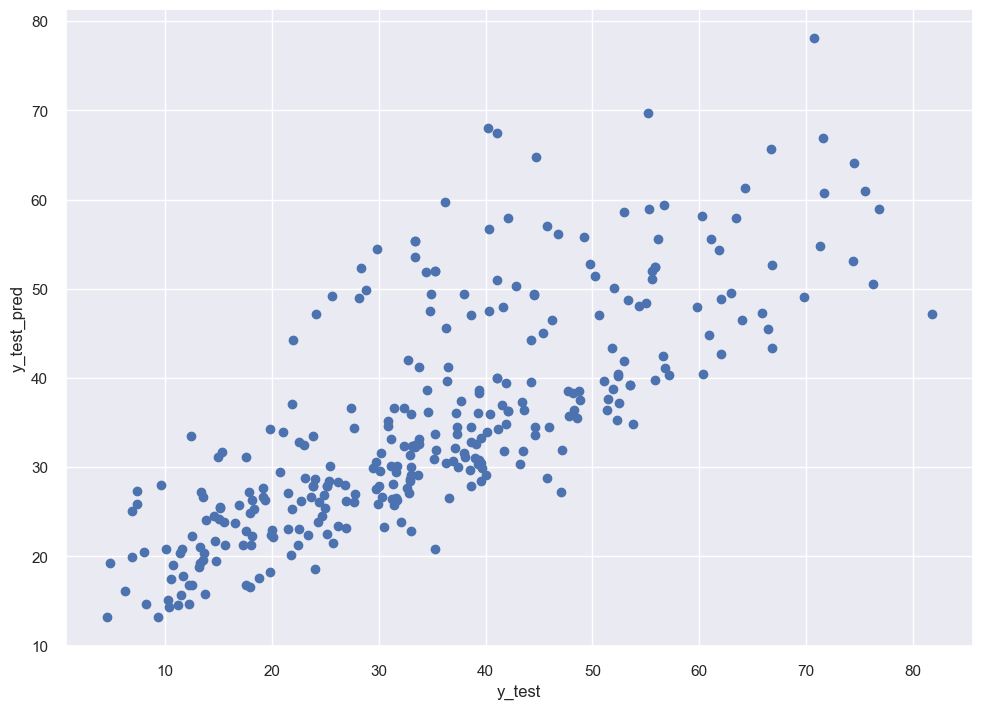

In [71]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

# Ridge

In [153]:
alpha = 0.01
ridge = Ridge(alpha=alpha).fit(X_train_scaled, y_train)
yridge = ridge.predict(X_train_scaled)

print("--------------------------------------")
print("The model performance for training set")
print("--------------------------------------")
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_train, yridge))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_train, yridge))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_train, yridge))

# model evaluation for testing set
y_test_pred = ridge.predict(X_test_scaled)
print("--------------------------------------")
print("The model performance for testing set")
print("--------------------------------------")
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_test, y_test_pred))

--------------------------------------
The model performance for training set
--------------------------------------
Mean squared error (MSE): 107.24
Mean absolute error (MAE): 8.18
Mean Absolute Percentage Error (MAPE): 31.40
--------------------------------------
The model performance for testing set
--------------------------------------
Mean squared error (MSE): 109.72
Mean absolute error (MAE): 8.30
Mean Absolute Percentage Error (MAPE): 32.20


In [80]:
alphas = np.logspace(-2,3,100)

ridge_mse_train  = []
ridge_mse_test = []
ridge_mae_train = []
ridge_mae_test = []
ridge_mape_train = []
ridge_mape_test = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train_scaled, y_train)
    yridge_train = ridge.predict(X_train_scaled)
    yridge_test = ridge.predict(X_test_scaled)
    
    #Results
    ridge_mse_train.append(mean_squared_error(y_train, yridge_train))
    ridge_mse_test.append(mean_squared_error(y_test, yridge_test))
    ridge_mae_train.append(mean_absolute_error(y_train, yridge_train))
    ridge_mae_test.append(mean_absolute_error(y_test, yridge_test))
    ridge_mape_train.append(MAPE(y_train, yridge_train))
    ridge_mape_test.append(MAPE(y_test, yridge_test))

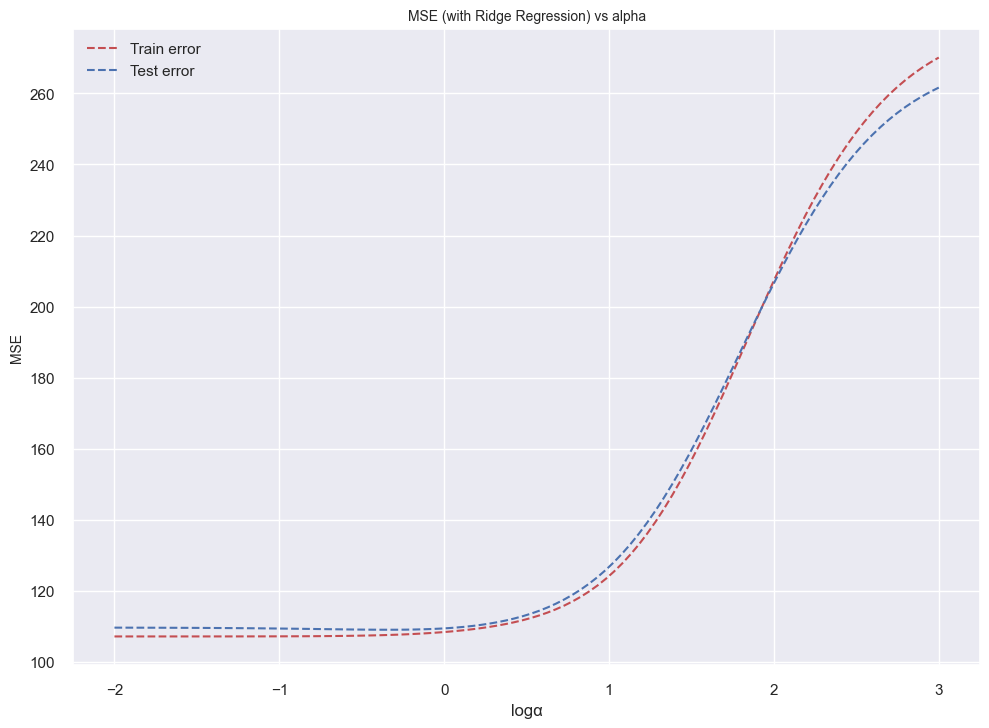

In [81]:
plot_train_test_errors_ridge(ridge_mse_train, ridge_mse_test, alphas)

# LASSO

In [82]:
alpha = 0.01

lasso = Lasso(max_iter = 10000, normalize = True)
lasso.set_params(alpha=alpha)
lasso.fit(X_train_scaled, y_train)
ylasso = lasso.predict(X_train_scaled)

print("--------------------------------------")
print("The model performance for training set")
print("--------------------------------------")
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_train, ylasso))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_train, ylasso))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_train, ylasso))

# model evaluation for testing set
y_test_pred = lasso.predict(X_test_scaled)
print("--------------------------------------")
print("The model performance for testing set")
print("--------------------------------------")
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_test, y_test_pred))

--------------------------------------
The model performance for training set
--------------------------------------
Mean squared error (MSE): 107.32
Mean absolute error (MAE): 8.20
Mean Absolute Percentage Error (MAPE): 31.53
--------------------------------------
The model performance for testing set
--------------------------------------
Mean squared error (MSE): 109.28
Mean absolute error (MAE): 8.30
Mean Absolute Percentage Error (MAPE): 32.31


In [83]:
alphas = np.logspace(-2,3,100)

lasso_mse_train  = []
lasso_mse_test = []
lasso_mae_train = []
lasso_mae_test = []
lasso_mape_train = []
lasso_mape_test = []

for alpha in alphas:
    lasso = Lasso(max_iter = 10000, normalize = True)
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    ylasso_train = lasso.predict(X_train_scaled)
    ylasso_test = lasso.predict(X_test_scaled)

    #Results
    lasso_mse_train.append(mean_squared_error(y_train, ylasso_train))
    lasso_mse_test.append(mean_squared_error(y_test, ylasso_test))
    lasso_mae_train.append(mean_absolute_error(y_train, ylasso_train))
    lasso_mae_test.append(mean_absolute_error(y_test, ylasso_test))
    lasso_mape_train.append(MAPE(y_train, ylasso_train))
    lasso_mape_test.append(MAPE(y_test, ylasso_test))

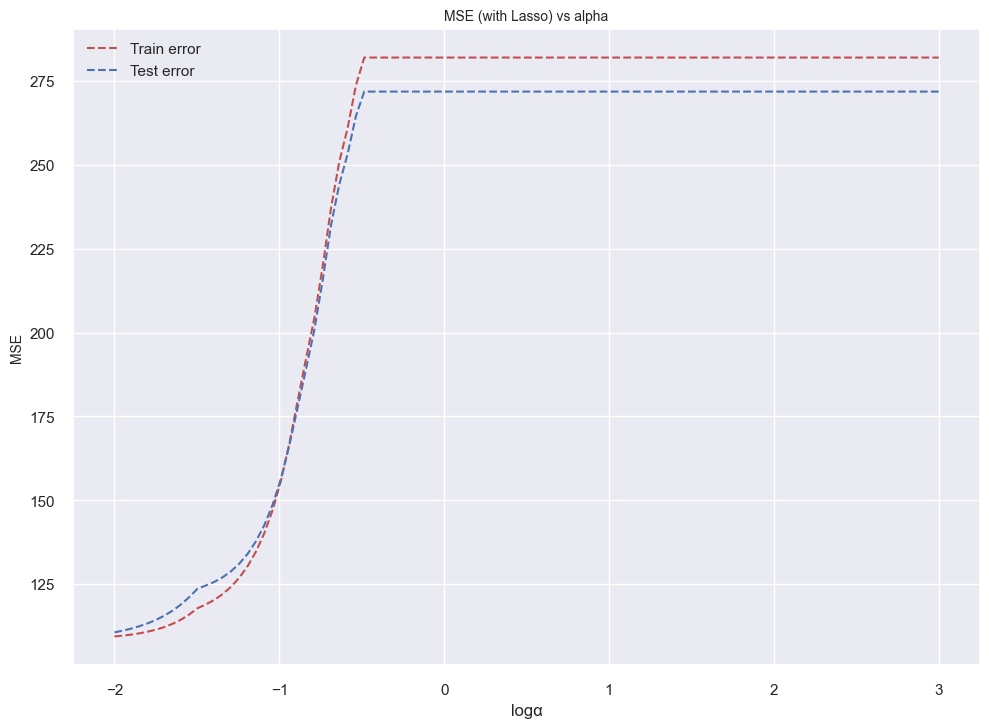

In [84]:
plot_train_test_errors_lasso(lasso_mse_train, lasso_mse_test, alphas)

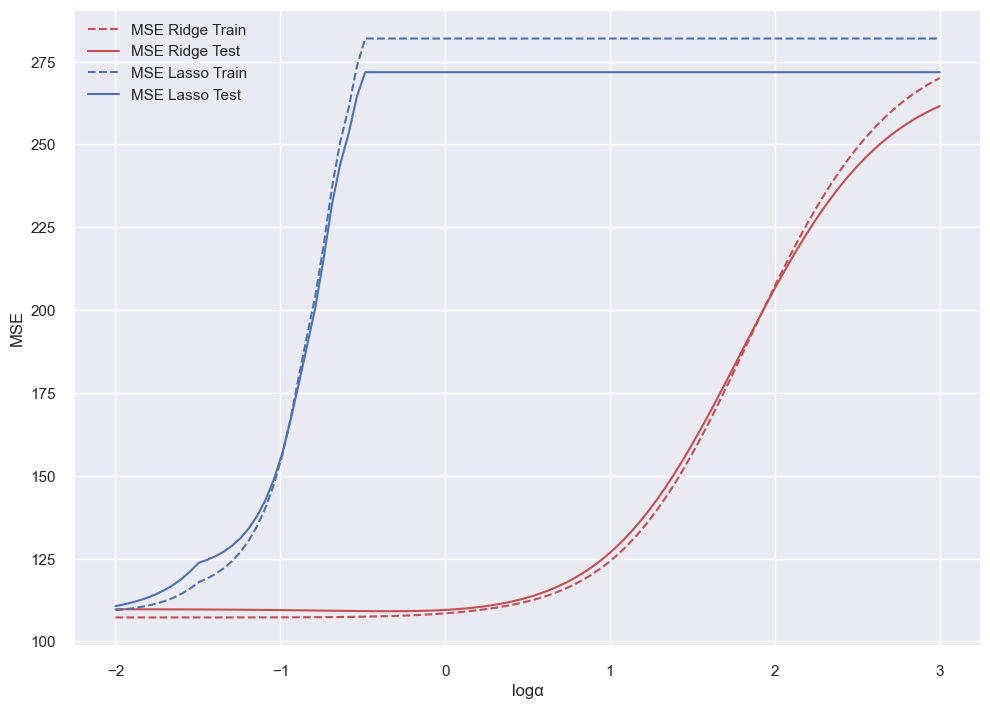

In [93]:
plt.figure()
plt.plot(np.log10(alphas), ridge_mse_train, 'r--', label = 'MSE Ridge Train')
plt.plot(np.log10(alphas), ridge_mse_test, 'r', label = 'MSE Ridge Test')
plt.plot(np.log10(alphas), lasso_mse_train, 'b--', label = 'MSE Lasso Train')
plt.plot(np.log10(alphas), lasso_mse_test, 'b', label = 'MSE Lasso Test')
plt.xlabel('logα')
plt.ylabel('MSE')
plt.legend()
plt.show()

-------------
# Implement K fold Cross-Validation in Scikit-Learn
-----------------
K-fold cross-validation is a superior technique to validate the performance of our model. It evaluates the model using different chunks of the data set as the validation set. We divide our data set into K-folds. K represents the number of folds into which you want to split your data. If we use 5-folds, the data set divides into five sections. In different iterations, one part becomes the validation set.
https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/ (A nice picture explaining it)

In [152]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold

kf = KFold(10)
alphas = np.logspace(-2,3,100)

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', 
                  normalize = True, cv=KFold(10))
ridgecv.fit(X_train_scaled, y_train)
ridgecv.alpha_

0.01

In [140]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate

def cross_validation(model, _X, _y, _cv=10):
    
    scores = ['neg_mean_squared_error']
    results = cross_validate(estimator=model, X=_X, y=_y, cv=_cv, scoring=scores,
                             return_train_score=True)
    return {"Training MSE": results['train_neg_mean_squared_error'],
              "Mean Training MSE": results['train_neg_mean_squared_error'].mean()*100,
              #"Training MAE": results['train_mean_absolute_error'],
              #"Mean Training MAE": results['train_mean_absolute_error'].mean(),
              #"Training MAPE": results['train_mape'],
              #"Mean Training MAPE": results['train_mape'].mean(),
              "Validation MSE": results['test_neg_mean_squared_error'],
              "Mean Validation MSE": results['test_neg_mean_squared_error'].mean()*100,
              #"Validation MAE": results['test_mean_absolute_error'],
              #Mean Validation MAE": results['test_mean_absolute_error'].mean(),
              #"Validation MAPE": results['test_mape'],
              #"Mean Validation MAPE": results['test_mape'].mean()
              }

In [141]:
cross_validation(lasso, X_train_scaled, y_train)

{'Training MSE': array([-273.82498493, -272.60363816, -287.01401149, -280.21787619,
        -283.04888704, -278.03989648, -282.14154486, -291.55233548,
        -283.47906017, -287.45111803]),
 'Mean Training MSE': -28193.733528388053,
 'Validation MSE': array([-354.26731719, -367.62924177, -236.5244566 , -297.98707632,
        -272.24602634, -317.38586541, -280.44201988, -196.56997031,
        -268.34455927, -232.72685144]),
 'Mean Validation MSE': -28241.2338452589}

--------------------
# Underfitting vs. Overfitting
--------------------------
We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.
